# In Class Notebook, Week 15

You can always click this URL https://github.com/UIUC-iSchool-DataViz/is445_oauoag_fall2022/blob/master/week15/inClass_week15.ipynb 

Or paste the URL into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import nltk

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jnaiman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jnaiman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /Users/jnaiman/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords, words
import string
import itertools

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [4]:
filename = '/Users/jnaiman/Downloads/othello.txt'
with open(filename,'r') as f:
    text = f.read()

In [5]:
text[:1000]

"\nACT I\nSCENE I. Venice. A street.\nEnter RODERIGO and IAGO\nRODERIGO\nTush! never tell me; I take it much unkindly\nThat thou, Iago, who hast had my purse\nAs if the strings were thine, shouldst know of this.\nIAGO\n'Sblood, but you will not hear me:\nIf ever I did dream of such a matter, Abhor me.\nRODERIGO\nThou told'st me thou didst hold him in thy hate.\nIAGO\nDespise me, if I do not. Three great ones of the city,\nIn personal suit to make me his lieutenant,\nOff-capp'd to him: and, by the faith of man,\nI know my price, I am worth no worse a place:\nBut he; as loving his own pride and purposes,\nEvades them, with a bombast circumstance\nHorribly stuff'd with epithets of war;\nAnd, in conclusion,\nNonsuits my mediators; for, 'Certes,' says he,\n'I have already chose my officer.'\nAnd what was he?\nForsooth, a great arithmetician,\nOne Michael Cassio, a Florentine,\nA fellow almost damn'd in a fair wife;\nThat never set a squadron in the field,\nNor the division of a battle knows

In [6]:
myWords = text.split()

In [7]:
myWords

['ACT',
 'I',
 'SCENE',
 'I.',
 'Venice.',
 'A',
 'street.',
 'Enter',
 'RODERIGO',
 'and',
 'IAGO',
 'RODERIGO',
 'Tush!',
 'never',
 'tell',
 'me;',
 'I',
 'take',
 'it',
 'much',
 'unkindly',
 'That',
 'thou,',
 'Iago,',
 'who',
 'hast',
 'had',
 'my',
 'purse',
 'As',
 'if',
 'the',
 'strings',
 'were',
 'thine,',
 'shouldst',
 'know',
 'of',
 'this.',
 'IAGO',
 "'Sblood,",
 'but',
 'you',
 'will',
 'not',
 'hear',
 'me:',
 'If',
 'ever',
 'I',
 'did',
 'dream',
 'of',
 'such',
 'a',
 'matter,',
 'Abhor',
 'me.',
 'RODERIGO',
 'Thou',
 "told'st",
 'me',
 'thou',
 'didst',
 'hold',
 'him',
 'in',
 'thy',
 'hate.',
 'IAGO',
 'Despise',
 'me,',
 'if',
 'I',
 'do',
 'not.',
 'Three',
 'great',
 'ones',
 'of',
 'the',
 'city,',
 'In',
 'personal',
 'suit',
 'to',
 'make',
 'me',
 'his',
 'lieutenant,',
 "Off-capp'd",
 'to',
 'him:',
 'and,',
 'by',
 'the',
 'faith',
 'of',
 'man,',
 'I',
 'know',
 'my',
 'price,',
 'I',
 'am',
 'worth',
 'no',
 'worse',
 'a',
 'place:',
 'But',
 'he;',


In [21]:
wordsDict = {}
for word in myWords:
    if word in wordsDict:
        wordsDict[word] += 1
    else:
        wordsDict[word] = 1

In [22]:
wordsDict

{'ACT': 5,
 'I': 803,
 'SCENE': 15,
 'I.': 7,
 'Venice.': 5,
 'A': 52,
 'street.': 4,
 'Enter': 47,
 'RODERIGO': 72,
 'and': 584,
 'IAGO': 288,
 'Tush!': 1,
 'never': 34,
 'tell': 18,
 'me;': 14,
 'take': 21,
 'it': 193,
 'much': 24,
 'unkindly': 1,
 'That': 101,
 'thou,': 4,
 'Iago,': 23,
 'who': 16,
 'hast': 18,
 'had': 53,
 'my': 368,
 'purse': 5,
 'As': 54,
 'if': 70,
 'the': 669,
 'strings': 1,
 'were': 27,
 'thine,': 1,
 'shouldst': 3,
 'know': 47,
 'of': 417,
 'this.': 6,
 "'Sblood,": 1,
 'but': 125,
 'you': 300,
 'will': 124,
 'not': 260,
 'hear': 19,
 'me:': 10,
 'If': 67,
 'ever': 20,
 'did': 51,
 'dream': 1,
 'such': 61,
 'a': 389,
 'matter,': 9,
 'Abhor': 1,
 'me.': 24,
 'Thou': 18,
 "told'st": 2,
 'me': 181,
 'thou': 115,
 'didst': 7,
 'hold': 14,
 'him': 109,
 'in': 288,
 'thy': 74,
 'hate.': 1,
 'Despise': 1,
 'me,': 32,
 'do': 170,
 'not.': 13,
 'Three': 2,
 'great': 23,
 'ones': 4,
 'city,': 2,
 'In': 31,
 'personal': 2,
 'suit': 6,
 'to': 455,
 'make': 44,
 'his': 156

In [11]:
import operator

In [23]:
wordsDict = sorted(wordsDict.items(), key=operator.itemgetter(1))

In [25]:
wordsDict[::-1]

[('I', 803),
 ('the', 669),
 ('and', 584),
 ('to', 455),
 ('of', 417),
 ('a', 389),
 ('my', 368),
 ('you', 300),
 ('in', 288),
 ('IAGO', 288),
 ('OTHELLO', 287),
 ('not', 260),
 ('is', 247),
 ('that', 236),
 ('be', 195),
 ('your', 194),
 ('with', 194),
 ('it', 193),
 ('have', 187),
 ('And', 185),
 ('me', 181),
 ('DESDEMONA', 175),
 ('do', 170),
 ('he', 159),
 ('for', 157),
 ('his', 156),
 ('this', 154),
 ('her', 149),
 ('but', 125),
 ('CASSIO', 124),
 ('will', 124),
 ('EMILIA', 121),
 ('To', 117),
 ('thou', 115),
 ('she', 113),
 ('as', 110),
 ('him', 109),
 ('That', 101),
 ('so', 89),
 ('are', 88),
 ('The', 87),
 ('on', 87),
 ('shall', 83),
 ('by', 81),
 ('am', 80),
 ('What', 76),
 ('O', 74),
 ('thy', 74),
 ('But', 73),
 ('would', 72),
 ('RODERIGO', 72),
 ('if', 70),
 ('all', 68),
 ('If', 67),
 ('from', 66),
 ('what', 65),
 ('was', 64),
 ('no', 63),
 ('For', 62),
 ('O,', 62),
 ('such', 61),
 ('at', 60),
 ('My', 59),
 ('some', 59),
 ('or', 57),
 ('good', 57),
 ('you,', 55),
 ("I'll", 55

In [26]:
#wordsDict = wordsDict[::-1] # re-orderded the list
wordsDict = dict(wordsDict[::-1]) # re-orderded the DICTIOINARY

In [28]:
#wordsDict

In [42]:
n = 50 # grab only the 50 most popular words

In [43]:
wordsPlot = {k: wordsDict[k] for k in list(wordsDict)[:n]}
# grab only parts of my origional dictionary that are at the nth top of my ordered key/value pairs

In [44]:
#wordsPlot

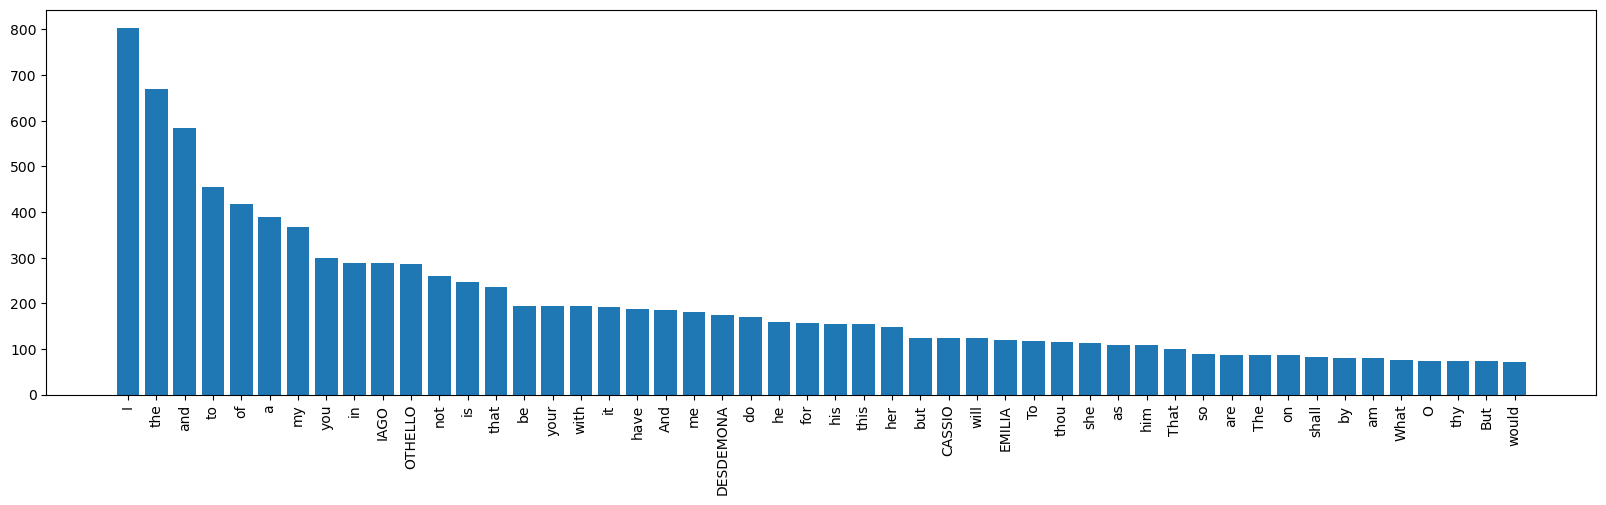

In [45]:
fig, ax = plt.subplots(figsize=(20,5))

ax.bar(range(len(wordsPlot)), list(wordsPlot.values()), align='center')

ax.set_xticks(range(len(wordsPlot)))
ax.set_xticklabels(list(wordsPlot.keys()))

plt.xticks(rotation=90)

plt.show()

In [46]:
len(wordsDict)

6484

In [47]:
stop_words = set(stopwords.words('english'))

In [48]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [51]:
wordsDictLess = {}
for w, count in wordsDict.items():
    if w.lower() not in stop_words:
        wordsDictLess[w] = count

In [53]:
len(wordsDictLess)

6271

In [54]:
wordsPlot = {k: wordsDictLess[k] for k in list(wordsDictLess)[:n]}

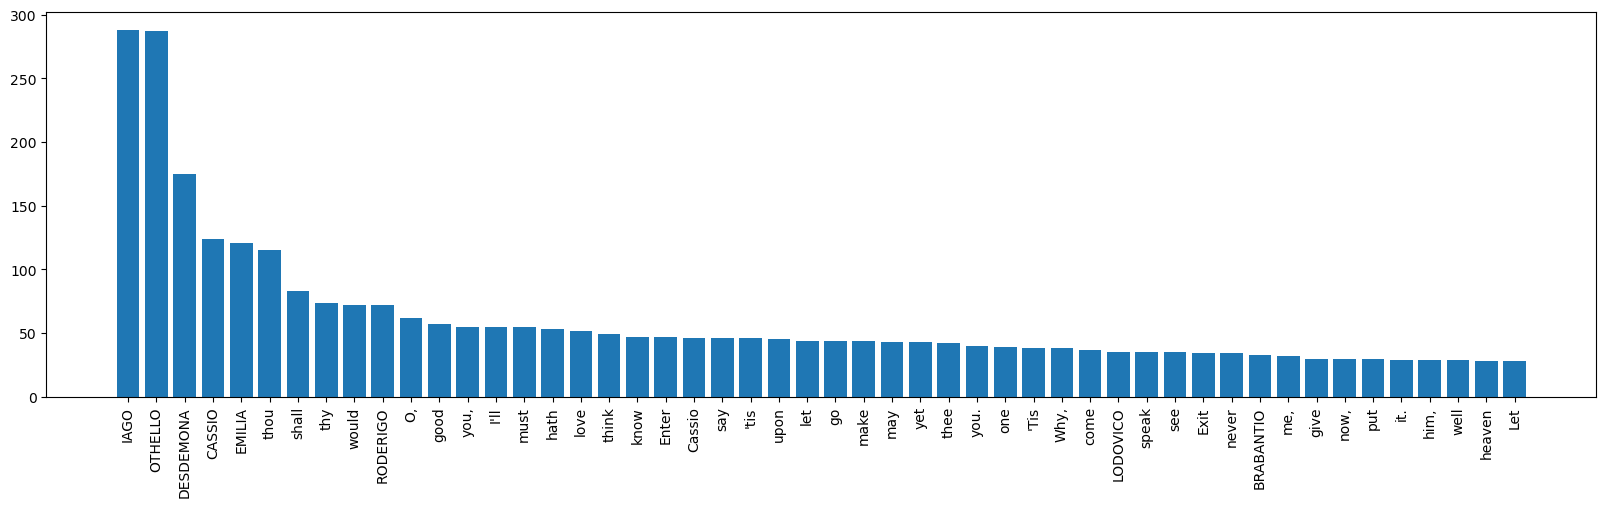

In [55]:
fig, ax = plt.subplots(figsize=(20,5))

ax.bar(range(len(wordsPlot)), list(wordsPlot.values()), align='center')

ax.set_xticks(range(len(wordsPlot)))
ax.set_xticklabels(list(wordsPlot.keys()))

plt.xticks(rotation=90)

plt.show()

In [56]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
wordsDictLessPunc = {}
for w, count in wordsDictLess.items():
    if w[-1] in string.punctuation: # if there is trailing punctuation
        w = w[:-1] # remove the last character in word
    if len(w) > 0: # if the word, w, was ONLY punctuation, don't count it
        wordsDictLessPunc[w] = count

In [59]:
#wordsDictLessPunc

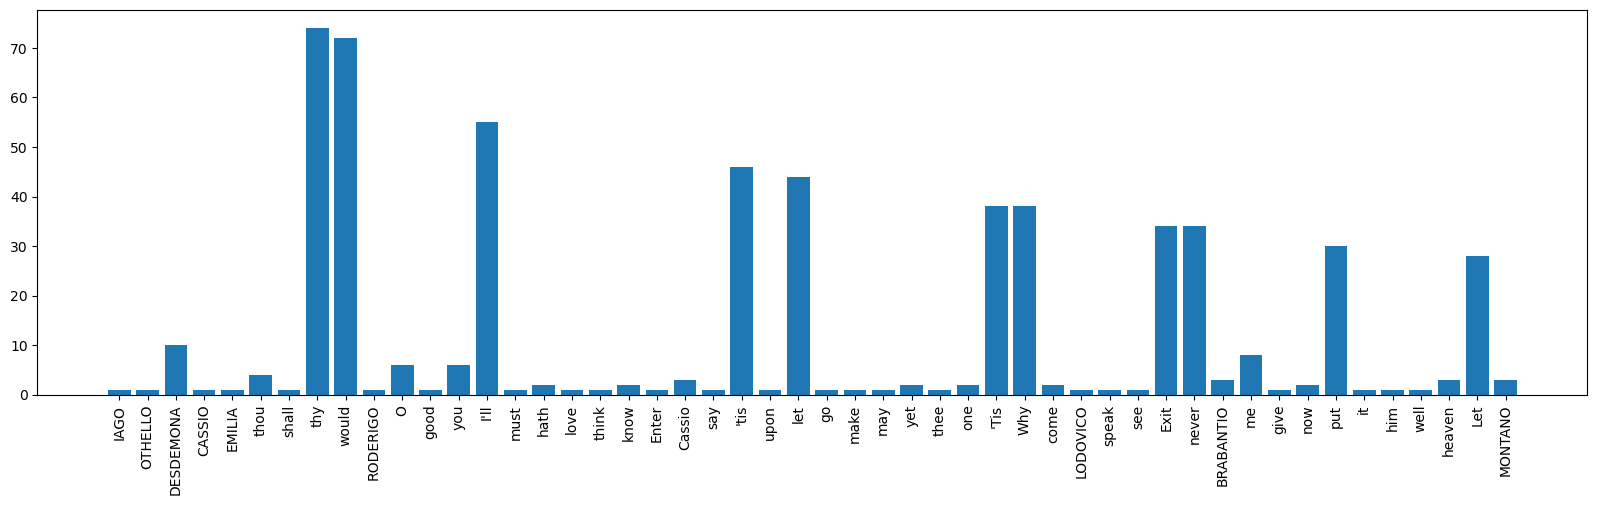

In [60]:
wordsPlot = {k: wordsDictLessPunc[k] for k in list(wordsDictLessPunc)[:n]}

fig, ax = plt.subplots(figsize=(20,5))

ax.bar(range(len(wordsPlot)), list(wordsPlot.values()), align='center')

ax.set_xticks(range(len(wordsPlot)))
ax.set_xticklabels(list(wordsPlot.keys()))

plt.xticks(rotation=90)

plt.show()

In [61]:
# above doesn't take into account that NOW things like "with" and "with," should be counted as the same word

In [ ]:
#all cleaning all at once!
wordsDictLessPunc = {}
for word in myWords:
    if word in wordsDict:
        wordsDict[word] += 1
    else:
        wordsDict[word] = 1